In [6]:
# Imports
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


Initializing the Convolutional Neural Network.

In [7]:
classifier = Sequential()

We will convert all our 256x256 pixel images into a 3D array (since the images are colored with 3 color channels).

In [8]:
# First Convolutional Layer
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Pooling to reduce the size of the feature map resulting from the first convolutional layer (divided by 2).

In [9]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:

# Adding the Second Convolutional Layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [11]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Flatten to convert the 2D data structure resulting from the previous layer into a 1D structure, i.e., a vector.

In [12]:
classifier.add(Flatten())


We use a rectified linear unit (ReLU) activation function, followed by a sigmoid activation function, to obtain the probabilities of each image containing a firearm or not.

In [13]:
# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

To compile the network, we use the "Adam" optimizer, an excellent first-order optimization algorithm for gradient-based optimization of stochastic objective functions. It utilizes an adaptive estimation of lower-order moments.

We use a log loss function with "binary cross-entropy" since it works well with sigmoid functions. Our metric will be accuracy since that is our main concern in training this type of model.

In [14]:
# Compiling the network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# Creating the train_datagen and validation_datagen objects with the preprocessing rules for the images.
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


Two objects previously created to preprocess the training and validation data.

In [16]:
# Preprocessing of training and validation images.
training_set = train_datagen.flow_from_directory('dataset_training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 1695 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [17]:
# Running the training (this process can take a significant amount of time, depending on your computer).
classifier.fit_generator(training_set,
                         steps_per_epoch = 53,
                         epochs = 38,
                         validation_data = validation_set,
                         validation_steps = 53)

C:\Users\johnn\AppData\Local\Temp\ipykernel_20676\3046109758.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/38
53/53 [==============================] - 37s 652ms/step - loss: 0.4883 - accuracy: 0.7652
Epoch 2/38
53/53 [==============================] - 18s 345ms/step - loss: 0.3625 - accuracy: 0.8330
Epoch 3/38
53/53 [==============================] - 14s 268ms/step - loss: 0.2896 - accuracy: 0.8714
Epoch 4/38
53/53 [==============================] - 14s 263ms/step - loss: 0.3022 - accuracy: 0.8714
Epoch 5/38
53/53 [==============================] - 13s 248ms/step - loss: 0.2448 - accuracy: 0.8938
Epoch 6/38
53/53 [==============================] - 13s 245ms/step - loss: 0.2423 - accuracy: 0.8991
Epoch 7/38
53/53 [==============================] - 13s 253ms/step - loss: 0.2211 - accuracy: 0.9115
Epoch 8/38
53/53 [==============================] - 13s 252ms/step - loss: 0.2095 - accuracy: 0.9127
Epoch 9/38
53/53 [==============================] - 13s 249ms/step - loss: 0.2092 - accuracy: 0.9215
Epoch 10/38
53/53 [==============================] - 13s 248ms/step - loss: 0.1868 - accura

1/1 [==============================] - 0s 142ms/step
There is a firearm in the image.


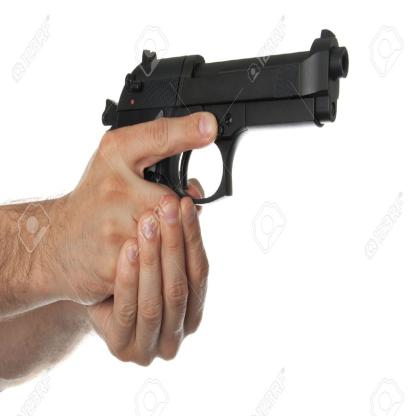

In [18]:
# Testing with an image.
import numpy as np
from IPython.display import Image
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('dataset_test/1.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'There is no firearm in the image.'
else:
    prediction = 'There is a firearm in the image.'

print(prediction)
Image(filename='dataset_test/1.jpg')

1/1 [==============================] - 0s 24ms/step
There is a firearm in the image.


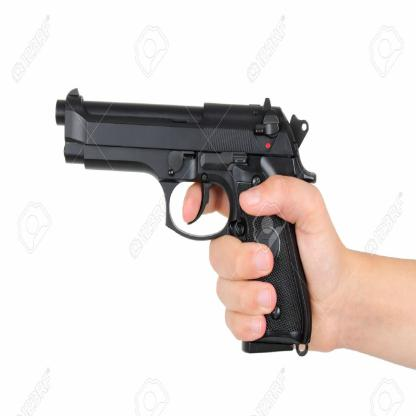

In [19]:
# Testing with an image.
import numpy as np
from IPython.display import Image
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('dataset_test/2.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'There is no firearm in the image.'
else:
    prediction = 'There is a firearm in the image.'

print(prediction)
Image(filename='dataset_test/2.jpg')

1/1 [==============================] - 0s 25ms/step
There is a firearm in the image.


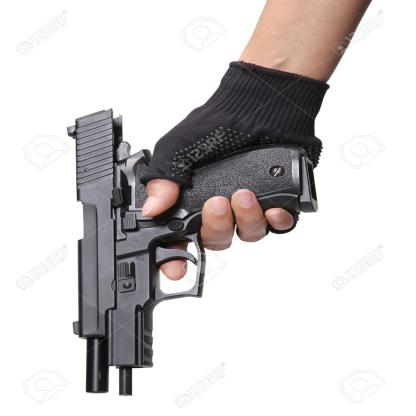

In [20]:
# Testing with an image.
import numpy as np
from IPython.display import Image
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('dataset_test/3.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'There is no firearm in the image.'
else:
    prediction = 'There is a firearm in the image.'

print(prediction)
Image(filename='dataset_test/3.jpg')